# Importing libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib
import numpy as np

# importing dataset

In [2]:
df=pd.read_csv("/content/segmentation data - segmentation data (1).xls")

# Analysing the dataset

In [4]:
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [5]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
df.shape

(2000, 8)

# Handling missing values 

In [9]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
df.Occupation.value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [11]:
df.Education.value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

In [12]:
df['Settlement size'].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

# Data Visualization

In [13]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


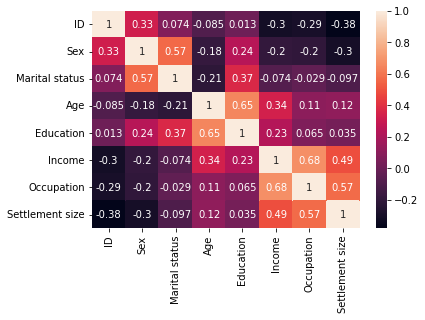

In [14]:
sns.heatmap(df.corr(),annot=True)

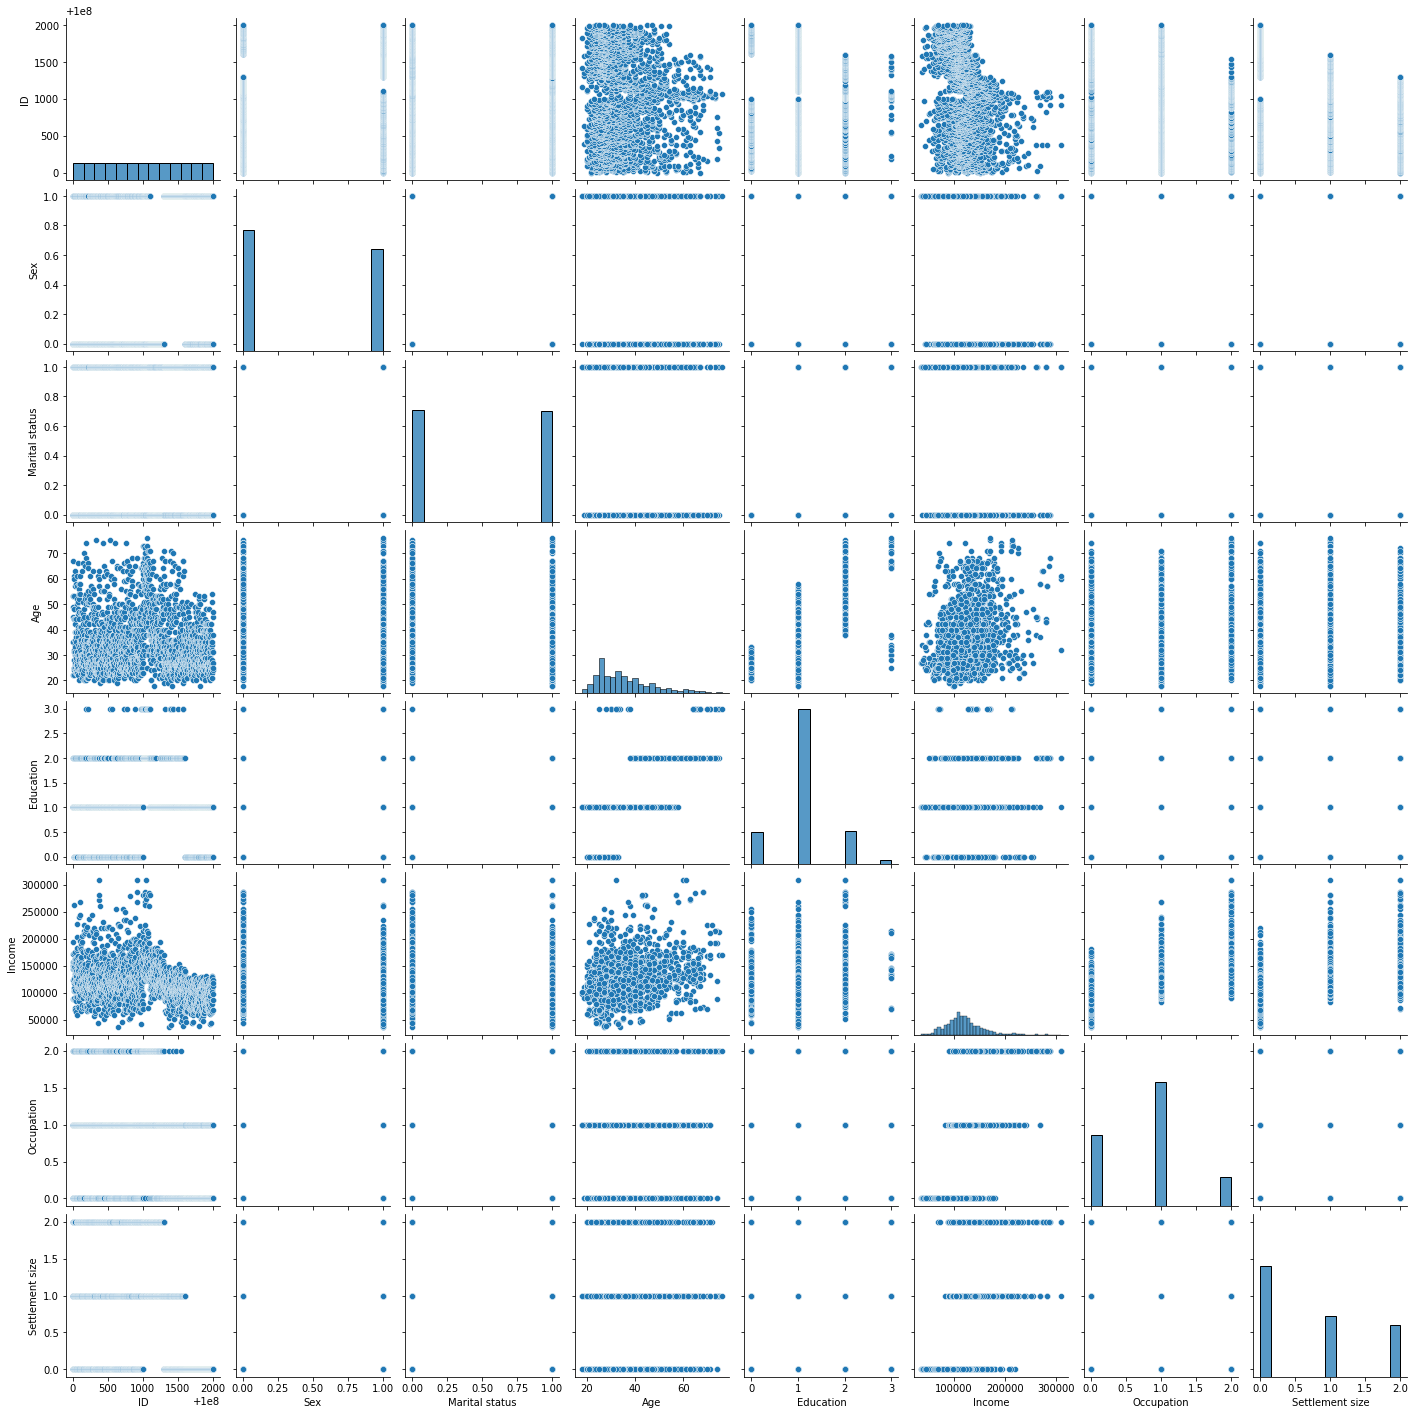

In [15]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


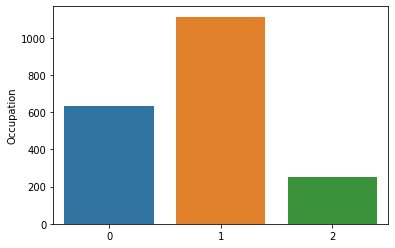

In [16]:
sns.barplot((df.Occupation.value_counts()).index,df.Occupation.value_counts())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c3d347a90>,
      dtype=object)

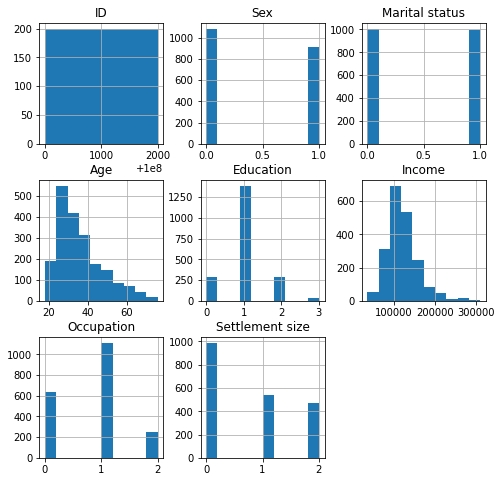

In [17]:
df.hist(figsize= (8,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


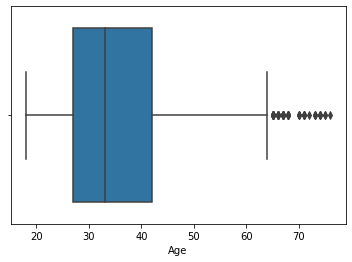

In [18]:
sns.boxplot(df.Age)

In [19]:
perc99=df.Age.quantile(0.99)
perc99

68.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


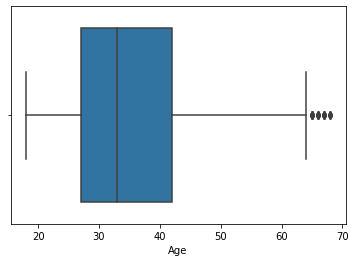

In [20]:
df=df[df.Age<=perc99]
sns.boxplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


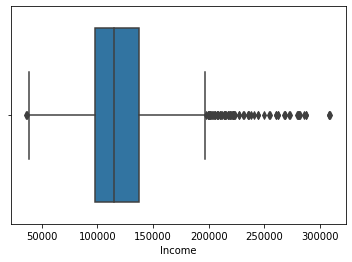

In [21]:
sns.boxplot(df.Income)

In [22]:
perc99=df.Income.quantile(0.99)
perc99

260873.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


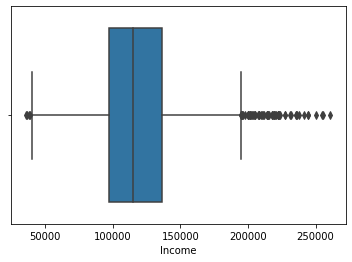

In [23]:
df=df[df.Income<=perc99]
sns.boxplot(df.Income)

# feature scaling 

In [24]:
from sklearn.preprocessing import scale
df=pd.DataFrame(scale(df),columns=df.columns)

In [25]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.728513,-0.920063,-0.995421,2.856891,1.698390,0.172171,0.329725,1.568333
1,-1.726790,1.086882,1.004600,-1.208816,-0.027280,0.936614,0.329725,1.568333
2,-1.725066,-0.920063,-0.995421,1.230608,-0.027280,-0.866297,-1.266797,-0.896998
3,-1.723343,-0.920063,-0.995421,0.869212,-0.027280,1.545521,0.329725,0.335667
4,-1.721619,-0.920063,-0.995421,1.592005,-0.027280,0.885599,0.329725,0.335667
...,...,...,...,...,...,...,...,...
1956,1.709801,1.086882,-0.995421,1.049910,-0.027280,0.138639,-1.266797,-0.896998
1957,1.711525,1.086882,1.004600,-0.757071,-0.027280,-0.030661,0.329725,-0.896998
1958,1.713248,-0.920063,-0.995421,-0.395674,-1.752949,-0.948590,-1.266797,-0.896998
1959,1.714971,1.086882,1.004600,-1.028118,-0.027280,-0.609813,-1.266797,-0.896998


# Unsupervised Model Building 

# importing and Initializing the Model

In [26]:
from sklearn.cluster import KMeans
from scipy import spatial

In [27]:
wscc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wscc.append(kmeans.inertia_)

In [28]:
import matplotlib as plt

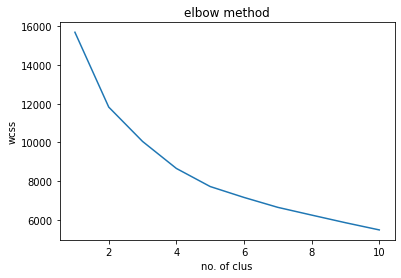

In [29]:
plt.pyplot.plot(range(1,11),wscc)
plt.pyplot.title("elbow method")
plt.pyplot.xlabel("no. of clus")
plt.pyplot.ylabel("wcss")
plt.pyplot.show()

In [30]:
km_model=KMeans(n_clusters=3,init="k-means++",random_state=0)

In [31]:
ykmeans=km_model.fit_predict(df)

In [32]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.728513,-0.920063,-0.995421,2.856891,1.69839,0.172171,0.329725,1.568333
1,-1.726790,1.086882,1.004600,-1.208816,-0.02728,0.936614,0.329725,1.568333
2,-1.725066,-0.920063,-0.995421,1.230608,-0.02728,-0.866297,-1.266797,-0.896998
3,-1.723343,-0.920063,-0.995421,0.869212,-0.02728,1.545521,0.329725,0.335667
4,-1.721619,-0.920063,-0.995421,1.592005,-0.02728,0.885599,0.329725,0.335667


In [33]:
df['kclus']=pd.Series(ykmeans)

In [34]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kclus
0,-1.728513,-0.920063,-0.995421,2.856891,1.69839,0.172171,0.329725,1.568333,0
1,-1.726790,1.086882,1.004600,-1.208816,-0.02728,0.936614,0.329725,1.568333,2
2,-1.725066,-0.920063,-0.995421,1.230608,-0.02728,-0.866297,-1.266797,-0.896998,2
3,-1.723343,-0.920063,-0.995421,0.869212,-0.02728,1.545521,0.329725,0.335667,2
4,-1.721619,-0.920063,-0.995421,1.592005,-0.02728,0.885599,0.329725,0.335667,2


# Splitting The Dataset Into Dependent And Independent Variable

In [35]:
y=df["kclus"]
x=df.drop(columns=["kclus"],axis=1)

# Splitting The Data Into Train And Test

In [36]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state =0)

# Supervised Model Building :

# Training And Testing The Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

In [38]:
rand_model=RandomForestClassifier()
tree_model=tree.DecisionTreeClassifier()
xgb_model=xgboost.XGBClassifier()

In [39]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

# model Evaluation

In [40]:
pred=rand_model.predict(x_train)
pred1=tree_model.predict(x_train)
pred2=xgb_model.predict(x_train)

In [41]:
from sklearn import metrics

In [42]:
print(metrics.accuracy_score(pred,y_train))
print(metrics.accuracy_score(pred1,y_train))
print(metrics.accuracy_score(pred2,y_train))

1.0
1.0
1.0


In [43]:
pred=rand_model.predict(x_test)
pred1=tree_model.predict(x_test)
pred2=xgb_model.predict(x_test)

In [44]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.9847328244274809
0.9770992366412213
0.9821882951653944


# Saving the model

In [45]:
import pickle

In [46]:
pickle.dump(xgb_model,open("cust_xgbmodel.pkl",'wb'))